In [3]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def readFASTA(inputfile): 
    """Reads a FASTA file and removes name line and special characters""" 
    # open file 
    with open(inputfile, "r") as f: 
        # remove name line / info line 
        seq = f.readline()
        # read data 
        seq = f.read() 
        # remove special character 
        seq = seq.replace("\n", "")
        seq = seq.replace("\t", "") 
        
    return seq 


In [2]:
# read FASTA 
s = readFASTA("C:\\Users\\ethan\\Downloads\\Ca_scaffolds\\Ca.protein.fa")

In [6]:
print(s[1:100])

EKLNKISPFRLSSLLRLQKDPKLAFQLFLNPNPNDPNPSSKPFRYSPLSYDLIISKLGRAKMFDELEQIIQKLRQDTRIIPKEIIFCNIITFYGRARLP


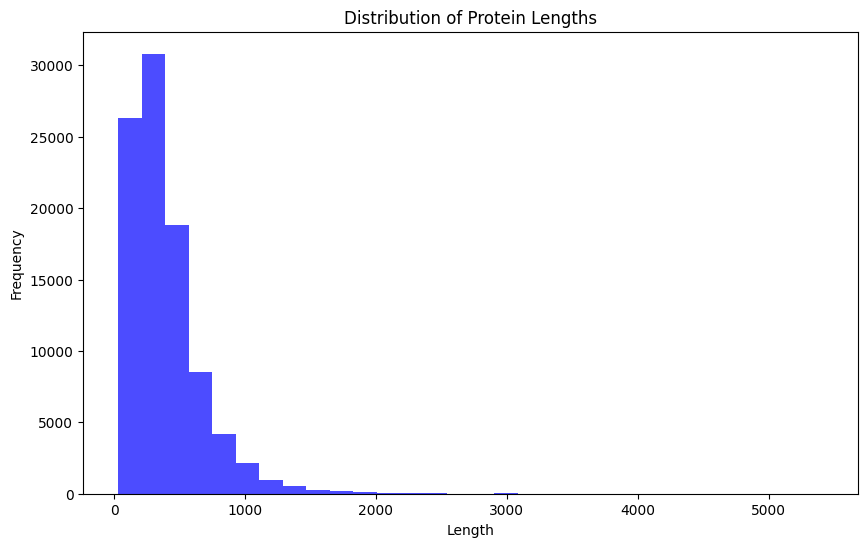

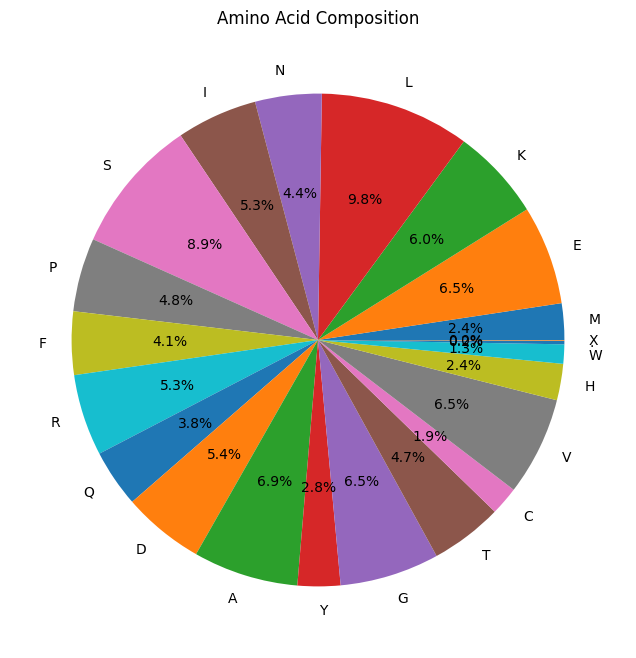

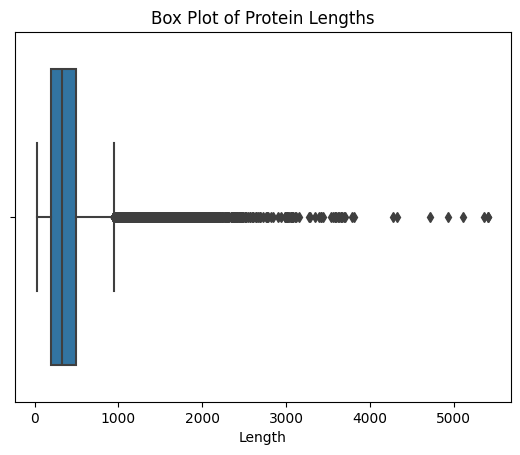

In [4]:


# Step 1: Read the FASTA file
file_path = "C:\\Users\\ethan\\Downloads\\Ca_scaffolds\\Ca.protein.fa"
sequences = [record.seq for record in SeqIO.parse(file_path, "fasta")]

# Step 2: Analyze the data
lengths = [len(seq) for seq in sequences]
length_stats = pd.Series(lengths).describe()

# Amino acid composition
all_sequence = ''.join(str(seq) for seq in sequences)
aa_counts = Counter(all_sequence)

# Step 3: Visualization
# Histogram of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Protein Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Pie chart of amino acid composition
plt.figure(figsize=(10, 8))
plt.pie(aa_counts.values(), labels=aa_counts.keys(), autopct='%1.1f%%')
plt.title('Amino Acid Composition')
plt.show()

# Box plot of sequence lengths
sns.boxplot(x=lengths)
plt.title('Box Plot of Protein Lengths')
plt.xlabel('Length')
plt.show()


In [8]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline("clustalw2", infile=file_path)
print(cline)
cline()

clustalw2 -infile=C:\Users\ethan\Downloads\Ca_scaffolds\Ca.protein.fa


ApplicationError: Non-zero return code 1 from 'clustalw2 -infile=C:\\Users\\ethan\\Downloads\\Ca_scaffolds\\Ca.protein.fa', message "'clustalw2' is not recognized as an internal or external command,"

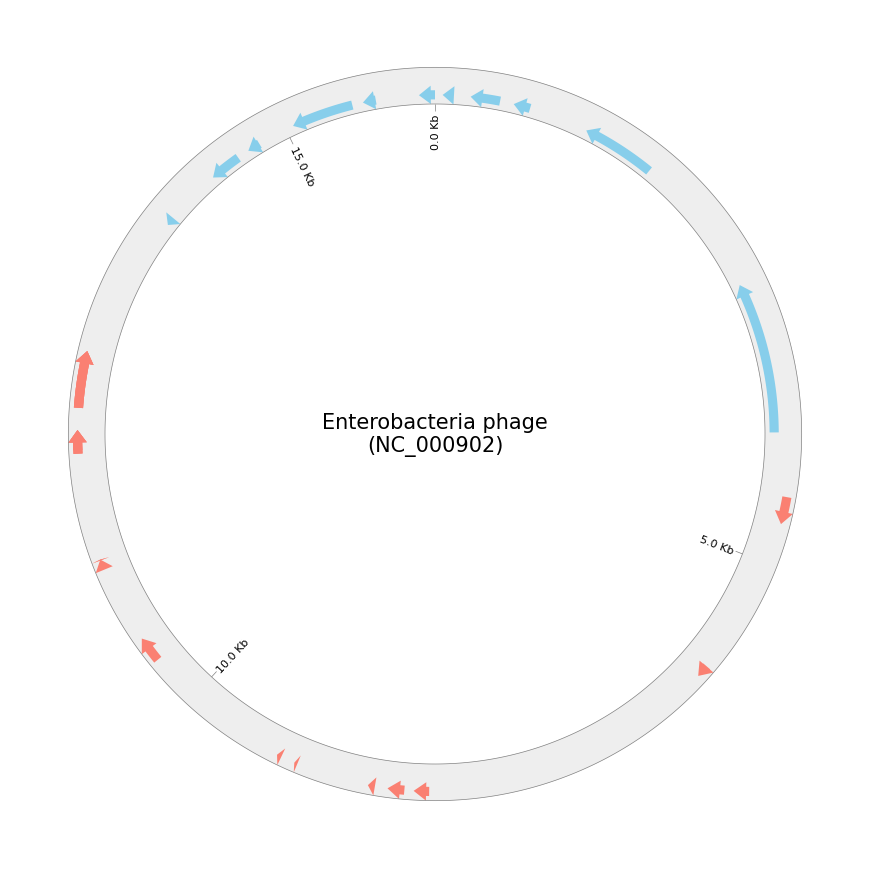

In [16]:
from pycirclize import Circos
from pycirclize.parser import Gff
from pycirclize.utils import load_prokaryote_example_file

# Load GFF file
gff_file = "C:\\Users\\ethan\\Downloads\\Ca_scaffolds\\Ca_genes.gff3"
gff = Gff(gff_file)

circos = Circos(sectors={gff.name: gff.range_size})
circos.text("Enterobacteria phage\n(NC_000902)", size=15)

sector = circos.sectors[0]
cds_track = sector.add_track((90, 100))
cds_track.axis(fc="#EEEEEE", ec="none")

# Plot forward & reverse CDS
f_cds_feats = gff.extract_features("CDS", target_strand=1)
cds_track.genomic_features(f_cds_feats, plotstyle="arrow", r_lim=(95, 100), fc="salmon")
r_cds_feats = gff.extract_features("CDS", target_strand=-1)
cds_track.genomic_features(r_cds_feats, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")

# Extract CDS product labels
pos_list, labels = [], []
for feat in gff.extract_features("CDS"):
    start, end = int(str(feat.location.end)), int(str(feat.location.start))
    pos = (start + end) / 2
    label = feat.qualifiers.get("product", [""])[0]
    if label == "" or label.startswith("hypothetical"):
        continue
    if len(label) > 20:
        label = label[:20] + "..."
    pos_list.append(pos)
    labels.append(label)

# Plot CDS product labels on outer position
cds_track.xticks(
    pos_list,
    labels,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=6,
    line_kws=dict(ec="grey"),
)
# Plot xticks & intervals on inner position
cds_track.xticks_by_interval(
    interval=5000,
    outer=False,
    show_bottom_line=True,
    label_formatter=lambda v: f"{v/ 1000:.1f} Kb",
    label_orientation="vertical",
    line_kws=dict(ec="grey"),
)

fig = circos.plotfig()